## Challenge 1 - Most Profiting Authors

In this challenge let's have a close look at the bonus challenge of the previous *SQL SELECT* lab -- **who are the top 3 most profiting authors**? Even if you have solved or think you have solved that problem in the previous lab, please still complete this challenge because the step-by-step guidances are helpful to train your problem-solving thinking.

In order to solve this problem, it is important for you to keep the following points in mind:

* In table `sales`, a title can appear several times. The royalties need to be calculated for each sale.

* Despite a title can have multiple `sales` records, the advance must be calculated only once for each title.

* In your eventual solution, you need to sum up the following profits for each individual author:
    * All advances which is calculated exactly once for each title.
    * All royalties in each sale.

Therefore, you will not be able to achieve the goal with a single SELECT query. Instead, you will need to follow several steps in order to achieve the eventual solution. Below is an overview of the steps:

1. Calculate the royalty of each sale for each author.

1. Using the output from Step 1 as a sub-table, aggregate the total royalties for each title for each author.

1. Using the output from Step 2 as a sub-table, calculate the total profits of each author by aggregating the advances and total royalties of each title.

Below we'll guide you through each step. In your `solutions.ipynb`, please include the SELECT queries of each step so that your TA can review your problem-solving process.

In [1]:
%load_ext sql

In [2]:
%sql sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db

In [3]:
%%sql
select name
from sqlite_master
where type="table"
order by name;

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


[('authors',),
 ('discounts',),
 ('employee',),
 ('jobs',),
 ('pub_info',),
 ('publishers',),
 ('roysched',),
 ('sales',),
 ('stores',),
 ('titleauthor',),
 ('titles',)]

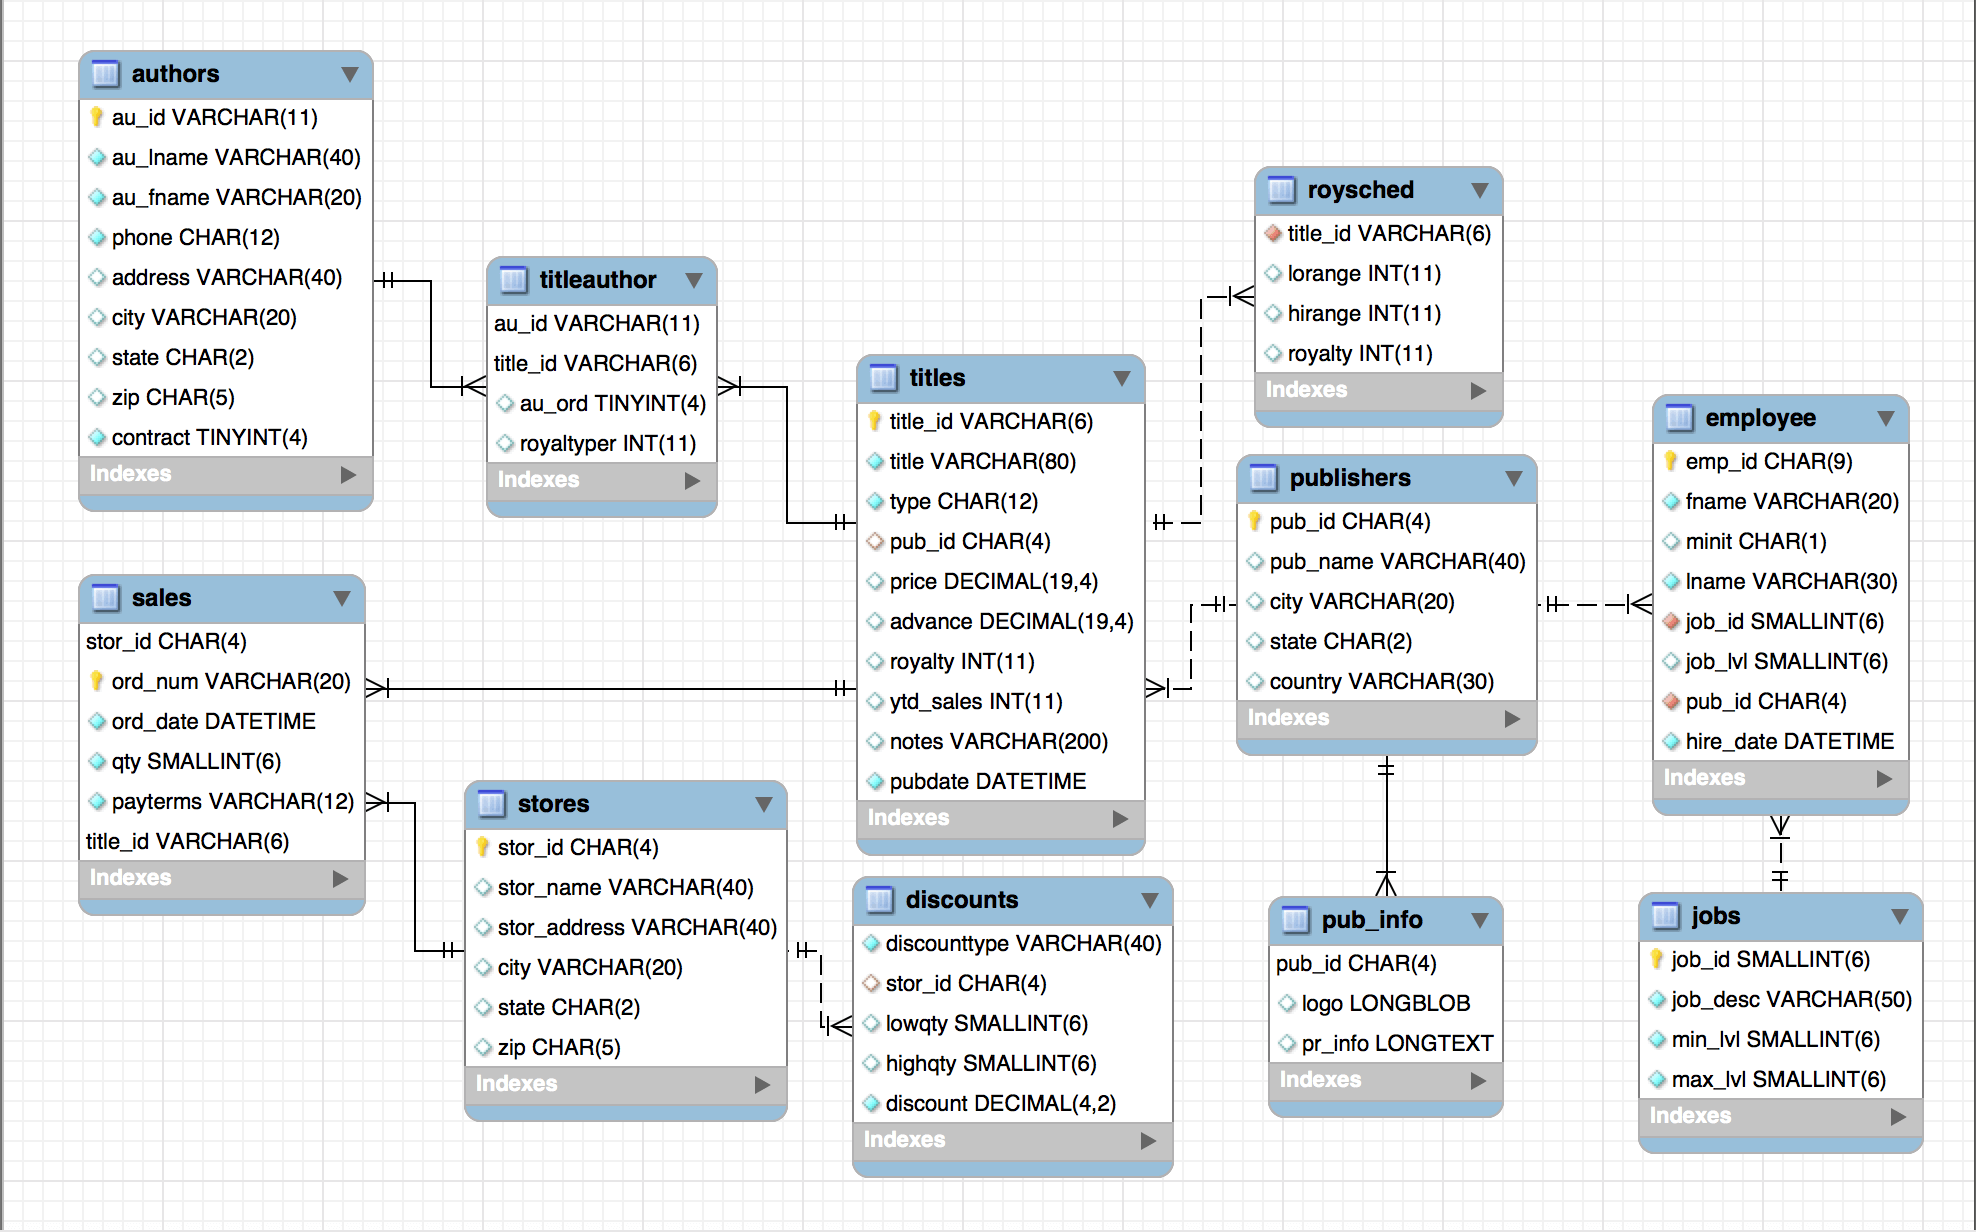

### Step 1: Calculate the royalties of each sales for each author

Write a SELECT query to obtain the following output:

* Title ID
* Author ID
* Royalty of each sale for each author
    * The formula is:
        ```
        sales_royalty = titles.price * sales.qty * titles.royalty / 100 * titleauthor.royaltyper / 100
        ```
    * Note that `titles.royalty` and `titleauthor.royaltyper` are divided by 100 respectively because they are percentage numbers instead of floats.

In the output of this step, each title may appear more than once for each author. This is because a title can have more than one sales.


In [53]:
%%sql
select titles.title as TITLE, titleauthor.au_id as Author_ID, titles.title_id as Title_ID, (titles.price * sales.qty * titles.royalty / 100 * titleauthor.royaltyper / 100) as sales_royalty
from titleauthor join titles on titleauthor.title_id = titles.title_id
                 join sales on titleauthor.title_id = sales.title_id
limit 10

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


[('Prolonged Data Deprivation: Four Case Studies', '172-32-1176', 'PS3333', 29.984999999999996),
 ("The Busy Executive's Database Guide", '213-46-8915', 'BU1032', 3.9979999999999993),
 ("The Busy Executive's Database Guide", '213-46-8915', 'BU1032', 7.995999999999999),
 ('You Can Combat Computer Stress!', '213-46-8915', 'BU2075', 25.116000000000003),
 ('But Is It User Friendly?', '238-95-7766', 'PC1035', 110.16),
 ('Cooking with Computers: Surreptitious Balance Sheets', '267-41-2394', 'BU1111', 11.95),
 ('Sushi, Anyone?', '267-41-2394', 'TC7777', 8.994),
 ('Straight Talk About Computers', '274-80-9391', 'BU7832', 29.984999999999996),
 ("The Busy Executive's Database Guide", '409-56-7008', 'BU1032', 5.996999999999999),
 ("The Busy Executive's Database Guide", '409-56-7008', 'BU1032', 11.993999999999998)]

In [9]:
%%sql
select *
from titleauthor
limit 5


 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


[('172-32-1176', 'PS3333', 1, 100),
 ('213-46-8915', 'BU1032', 2, 40),
 ('213-46-8915', 'BU2075', 1, 100),
 ('238-95-7766', 'PC1035', 1, 100),
 ('267-41-2394', 'BU1111', 2, 40)]

In [12]:
%%sql
select *
from titles
limit 3

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


[('BU1032', "The Busy Executive's Database Guide", 'business', '1389', 19.99, 5000, 10, 4095, 'An overview of available database systems with emphasis on common business applications. Illustrated.', '1991-06-12 00:00:00'),
 ('BU1111', 'Cooking with Computers: Surreptitious Balance Sheets', 'business', '1389', 11.95, 5000, 10, 3876, 'Helpful hints on how to use your electronic resources to the best advantage.', '1991-06-09 00:00:00'),
 ('BU2075', 'You Can Combat Computer Stress!', 'business', '0736', 2.99, 10125, 24, 18722, 'The latest medical and psychological techniques for living with the electronic office. Easy-to-understand explanations.', '1991-06-30 00:00:00')]

In [20]:
%%sql
select *
from authors
limit 3

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


[('172-32-1176', 'White', 'Johnson', '408 496-7223', '10932 Bigge Rd.', 'Menlo Park', 'CA', '94025', 1),
 ('213-46-8915', 'Green', 'Marjorie', '415 986-7020', '309 63rd St. #411', 'Oakland', 'CA', '94618', 1),
 ('238-95-7766', 'Carson', 'Cheryl', '415 548-7723', '589 Darwin Ln.', 'Berkeley', 'CA', '94705', 1)]

In [19]:
%%sql
select *
from sales
limit 3

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


[('6380', '6871', '1994-09-14 00:00:00', 5, 'Net 60', 'BU1032'),
 ('6380', '722a', '1994-09-13 00:00:00', 3, 'Net 60', 'PS2091'),
 ('7066', 'A2976', '1993-05-24 00:00:00', 50, 'Net 30', 'PC8888')]

### Step 2: Aggregate the total royalties for each title for each author

Using the output from Step 1, write a query to obtain the following output:

* Title ID
* Author ID
* Aggregated royalties of each title for each author
    * Hint: use the *SUM* subquery and group by both `au_id` and `title_id`

In the output of this step, each title should appear only once for each author

In [58]:
%%sql
select titles.title, titleauthor.au_id as Author_ID, titles.title_id as Title_ID, sum(titles.price * sales.qty * titles.royalty / 100 * titleauthor.royaltyper / 100) as sales_royalty
from titleauthor join titles on titleauthor.title_id = titles.title_id
                 join sales on titleauthor.title_id = sales.title_id
group by titleauthor.au_id, Author_ID
limit 15

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


[('Prolonged Data Deprivation: Four Case Studies', '172-32-1176', 'PS3333', 29.984999999999996),
 ("The Busy Executive's Database Guide", '213-46-8915', 'BU1032', 37.11),
 ('But Is It User Friendly?', '238-95-7766', 'PC1035', 110.16),
 ('Cooking with Computers: Surreptitious Balance Sheets', '267-41-2394', 'BU1111', 20.944),
 ('Straight Talk About Computers', '274-80-9391', 'BU7832', 29.984999999999996),
 ("The Busy Executive's Database Guide", '409-56-7008', 'BU1032', 17.990999999999996),
 ('Secrets of Silicon Valley', '427-17-2319', 'PC8888', 50),
 ('Sushi, Anyone?', '472-27-2349', 'TC7777', 8.994),
 ('Emotional Security: A New Algorithm', '486-29-1786', 'PS7777', 19.975),
 ('Fifty Years in Buckingham Palace Kitchens', '648-92-1872', 'TC4203', 33.46),
 ('Sushi, Anyone?', '672-71-3249', 'TC7777', 11.992),
 ('Silicon Valley Gastronomic Treats', '712-45-1867', 'MC2222', 23.987999999999996),
 ('The Gourmet Microwave', '722-51-5454', 'MC3021', 21.528),
 ('Cooking with Computers: Surreptitious Balance Sheets', '724-80-9391', 'BU1111', 28.72),
 ('Computer Phobic AND Non-Phobic Individuals: Behavior Variations', '756-30-7391', 'PS1372', 32.385)]

### Step 3: Calculate the total profits of each author

Now that each title has exactly one row for each author where the advance and royalties are available, we are ready to obtain the eventual output. Using the output from Step 2, write a query to obtain the following output:

* Author ID
* Profits of each author by aggregating the advance and total royalties of each title

Sort the output based on a total profits from high to low, and limit the number of rows to 3.

In [60]:
%%sql
select titleauthor.au_id as Author_ID, titles.title_id as Title_ID, sum(titles.advance) + sum(titles.price * sales.qty * titles.royalty / 100 * titleauthor.royaltyper / 100) as profit_author
from titleauthor join titles on titleauthor.title_id = titles.title_id
                 join sales on titleauthor.title_id = sales.title_id
group by titleauthor.au_id
order by profit_author desc


 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


[('899-46-2035', 'MC3021', 39178.132),
 ('722-51-5454', 'MC3021', 30021.528),
 ('213-46-8915', 'BU1032', 20162.11),
 ('998-72-3567', 'PS2091', 15187.956),
 ('267-41-2394', 'BU1111', 13020.944),
 ('724-80-9391', 'BU1111', 12028.72),
 ('409-56-7008', 'BU1032', 10017.991),
 ('427-17-2319', 'PC8888', 8050),
 ('846-92-7186', 'PC8888', 8050),
 ('672-71-3249', 'TC7777', 8011.992),
 ('472-27-2349', 'TC7777', 8008.994),
 ('238-95-7766', 'PC1035', 7110.16),
 ('807-91-6654', 'TC3218', 7083.8),
 ('756-30-7391', 'PS1372', 7032.385),
 ('274-80-9391', 'BU7832', 5029.985),
 ('648-92-1872', 'TC4203', 4033.46),
 ('486-29-1786', 'PS7777', 4019.975),
 ('172-32-1176', 'PS3333', 2029.985),
 ('712-45-1867', 'MC2222', 23.987999999999996)]

## Challenge 2

Elevating from your solution in Challenge 1 , create a table named `most_profiting_authors` to hold the data about the most profiting authors. The table should have 2 columns:

* `au_id` - Author ID
* `profits` - The profits of the author aggregating the advances and royalties

Include your solution in `solutions.ipynb`.

In [66]:
%%sql
CREATE TABLE most_profiting_authors AS
select titleauthor.au_id as Author_ID, sum(titles.advance) + sum(titles.price * sales.qty * titles.royalty / 100 * titleauthor.royaltyper / 100) as most_profiting_authors 
from titleauthor join titles on titleauthor.title_id = titles.title_id
                 join sales on titleauthor.title_id = sales.title_id
group by titleauthor.au_id
order by most_profiting_authors desc

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


[]

In [67]:
%%sql
select *
from most_profiting_authors

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


[('899-46-2035', 39178.132),
 ('722-51-5454', 30021.528),
 ('213-46-8915', 20162.11),
 ('998-72-3567', 15187.956),
 ('267-41-2394', 13020.944),
 ('724-80-9391', 12028.72),
 ('409-56-7008', 10017.991),
 ('427-17-2319', 8050),
 ('846-92-7186', 8050),
 ('672-71-3249', 8011.992),
 ('472-27-2349', 8008.994),
 ('238-95-7766', 7110.16),
 ('807-91-6654', 7083.8),
 ('756-30-7391', 7032.385),
 ('274-80-9391', 5029.985),
 ('648-92-1872', 4033.46),
 ('486-29-1786', 4019.975),
 ('172-32-1176', 2029.985),
 ('712-45-1867', 23.987999999999996)]